# Route Maps by Parade

This notebook will attempt to make sensable route maps by parade

In [60]:
#imports and such
from datetime import datetime
import geopandas as gpd
import geoplot as gplt
import os
from matplotlib import pyplot as plt
import shapely
import pyproj
import pandas as pd
import warnings
from functools import lru_cache
import numpy as np

In [2]:
#very annoying warnings coming from pyproj
warnings.filterwarnings('ignore', category=FutureWarning, module='pyproj')

In [3]:
def lp(v):
    print(f"[{datetime.now()}] {v}")

lp("Starting...")

[2025-02-25 18:13:19.279341] Starting...


In [4]:
mapsPath = f"{os.curdir}{os.sep}RouteMaps{os.sep}"
lp(f"Maps Path:  {mapsPath}")

if not os.path.exists(mapsPath):
    lp(f"Creating  {mapsPath}")
    os.mkdir(mapsPath)

[2025-02-25 18:13:19.283553] Maps Path:  ./RouteMaps/


In [5]:
dataPath = f"{os.curdir}{os.sep}datasets{os.sep}"
lp(f"Data Path:  {dataPath}")

[2025-02-25 18:13:19.288058] Data Path:  ./datasets/


In [6]:
#all the parade routes
routesDf = gpd.read_file(f"{dataPath}paradeRoutes.geojson")
#routesDf['geometry'] = routesDf['geometry'].map(lambda x: x.geoms[0])
routesDf.set_index('parade', inplace=True)
routesDf.head()

,location,numfloats,formation,disband,objectid,date,time,shape_stlength,day,geometry
parade,,,,,,,,,,
Chaos,Uptown,None,Napoleon and Magazine,Canal and Roosevelt Way,17,2025-02-27 18:30:00+00:00,6:30pm,18801.130441472782,2nd Thursday,"MULTILINESTRING ((-90.10137 29.92082, -90.1018..."
Cleopatra,Uptown,None,Napoleon and Tchoupitoulas,Poydras and Tchoupitoulas,4,2025-02-21 18:00:00+00:00,6:00pm,21161.075592614441,1st Friday,"MULTILINESTRING ((-90.10098 29.91716, -90.101 ..."
Krewe Du Vieux,Downtown,None,Marigny and Decatur,Andrew Higgins and S. Peters,34,2025-02-15 18:30:00+00:00,6:30pm,15476.953108061272,Walking Parade,"MULTILINESTRING ((-90.05506 29.96271, -90.0551..."
Tucks,Uptown,None,Napoleon and Tchoupitoulas,Poydras and Tchoupitoulas,22,2025-03-01 12:30:00+00:00,12:30pm,21095.835274003577,2nd Saturday,"MULTILINESTRING ((-90.10098 29.91716, -90.101 ..."
Bohème,Downtown,None,Decatur St. from Mandeville St to Music St.,Basin St and Canal St.,36,2025-02-14 19:00:00+00:00,7:00pm,12290.192829423802,Walking Parade,"MULTILINESTRING ((-90.05392 29.96277, -90.0550..."


In [7]:
#convert multilines to singlelines
#routesDf['geometry'] = routesDf['geometry'].map(lambda x: x.geoms[0])

In [8]:
#all of our streets
streetsDf = gpd.read_file(f"{dataPath}streets.geojson")
streetsDf.head()

,munileft,mtfcc,strtetype,maintby,centerlineid,stateright,fromleft,joinid,roadlevel,lasteditor,...,ctyroute,astrtetype,msagleft,fedrtetype,afedrte,inwater,toleft,shape_stlength,fullnameabv,geometry
0,New Orleans,None,None,None,2501358,LA,6200,460,None,CMARD,...,None,None,None,None,None,None,6298,374.69106670567925,Constance St,"MULTILINESTRING ((-90.12482 29.92233, -90.1249..."
1,New Orleans,None,None,None,2507761,LA,2600,873,None,CMARD,...,None,None,None,None,None,None,2698,351.09598315083429,Hamilton St,"MULTILINESTRING ((-90.1272 29.96419, -90.12711..."
2,New Orleans,None,None,None,2510743,LA,0,671,None,CMARD,...,None,None,None,None,None,None,0,50.711363770514147,Encampment St,"MULTILINESTRING ((-90.08325 29.99944, -90.0832..."
3,New Orleans,None,None,None,2515776,LA,5461,1732,None,DBALBERT,...,None,None,None,None,None,None,5499,165.29887948728282,N Rampart St,"MULTILINESTRING ((-90.01771 29.96031, -90.0172..."
4,New Orleans,None,None,None,2522988,LA,10701,1704,None,CMARD,...,None,None,None,None,None,None,10731,252.75257190809734,Prentiss Ave,"MULTILINESTRING ((-89.96195 30.0232, -89.96185..."


In [9]:
#this created plenty of warning but we are just loading it so we can see the mississppi and maybe some other water if it comes to that
riverDf = gpd.read_file(f"{dataPath}MississippiRiver.zip")
riverDf.head()

/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 3 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 4 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 5

,WATER2_ID,FEATURE,LENGTH,XXX,geometry
0,1,0,0.0,Region,"MULTIPOLYGON (((-90.54858 30.16849, -90.54896 ..."
1,2,0,0.0,Region,"MULTIPOLYGON (((-90.02944 29.96027, -90.02743 ..."
2,3,0,0.0,Region,"MULTIPOLYGON (((-90.3685 30.05726, -90.36874 3..."
3,4,0,0.0,None,"MULTIPOLYGON (((-89.4196 30.03959, -89.41818 3..."
4,5,0,0.0,None,"MULTIPOLYGON (((-89.37342 30.0375, -89.31526 3..."


In [10]:
sorted(routesDf.index)

['Alla',
 'Babylon',
 'Bacchus',
 'Barkus',
 'Bohème',
 'Carrollton',
 'Chaos',
 'Chewbacchus',
 'Choctaw',
 'Cleopatra',
 'Crescent City',
 "D'etat",
 'Druids',
 'Elks',
 'Endymion',
 'Femme Fatale',
 'Freret',
 'Hermes',
 'Iris',
 'King Arthur',
 'Krewe Du Vieux',
 'Mars',
 'Mid-City',
 'Morpheus',
 'Muses',
 'NOMTOC',
 'Okeanos',
 'Orpheus',
 'Oshun',
 'Pontchartrain',
 'Proteus',
 'Pygmalion',
 'Rex',
 'Sparta',
 'Thoth',
 'Tucks',
 'Zulu']

In [11]:
streetClasses = ['Local', 'Major Arterial', 'Freeway', 'Minor Arterial']

In [101]:
class MyRoute:

    
    
    def __init__(self, name):
        
        self.name = name
        self.extent = routesDf.loc[[self.name],'geometry'].total_bounds
                
        self.epsg = '32615'
        self.epsgRoute = routesDf.loc[[self.name],'geometry'].to_crs(f"EPSG:{self.epsg}")

        self.UTMtoWGS = pyproj.Transformer.from_crs(self.epsgRoute.crs, routesDf.crs)
        

    def transform2XY(self,lon,lat):
        lonTrans = self.extent[0] - self.extent[2]
        latTrans = self.extent[1] - self.extent[3]
    
        x = abs((lon - self.extent[0]) / lonTrans)
        y = abs((lat - self.extent[1]) / latTrans)
    
        return (x,y)

    
    def figSize(self, figWidth=10):

        lonLen = self.extent[2] - self.extent[0]
        latLen = self.extent[3] - self.extent[1]

        figHeight = figWidth * (latLen / lonLen)
        
        return (figWidth, figHeight)

    def extentWithBuffer(self,setExtent = True, buffer = 0.001):

        newExtent = shapely.geometry.box(*self.extent).buffer(buffer).bounds

        if setExtent:
            self.extent = newExtent
        
        return newExtent


    def xyOnRoute(self, distance):
        epsgPoint = self.epsgRoute.interpolate(distance,normalized=True)
        wgsPoint = self.UTMtoWGS.transform(epsgPoint.x, epsgPoint.y)
                
        return self.transform2XY(wgsPoint[1][0],wgsPoint[0][0])

    @lru_cache(maxsize=None)
    def intersectStreetsMask(self):
        return streetsDf.intersects(routesDf.loc[self.name,'geometry'] ) & streetsDf['roadclass'].isin(streetClasses)

       
    def respPointsLabelsStreets(self):
        labelPoints = streetsDf.loc[self.intersectStreetsMask(),'geometry'].map(lambda s: s.representative_point()).map(lambda p: self.transform2XY(p.x,p.y)).to_list()
        streetNames = streetsDf.loc[self.intersectStreetsMask(),'fullnameabv']

        return [(p[0],p[1],t) for p,t in zip(labelPoints, streetNames)]

    
    def getLabelRotations(self):

        bounds = streetsDf.loc[self.intersectStreetsMask(), 'geometry'].bounds

        rise = bounds['maxy'] - bounds['miny']

        run = bounds['maxx'] - bounds['minx']

        return np.degrees(np.atan2(rise, run))
        
        

[2025-02-25 18:40:50.281483] Creating Map for Chewbacchus		Fig Size: (10, 10.123919379498265)	Extent:  (-90.065688549738, 29.953192035750998, -90.04914601742199, 29.969939562101)	CRS:  <geoplot.crs.Mercator object at 0x7f8afe011090>
[2025-02-25 18:40:51.707718] Finished Chewbacchus in 0:00:01.428560


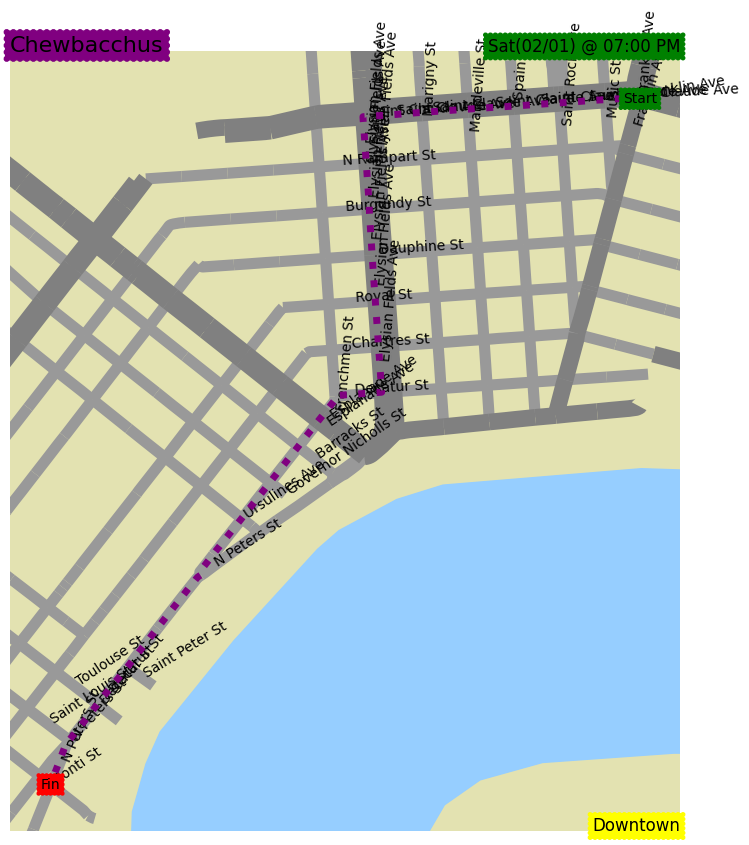

In [104]:


def plotParade(name="Chewbacchus", figWidth = 10, savePlot=False):

    startTime = datetime.now()

    crs = gplt.crs.Mercator()

    myRoute = MyRoute(name)

    extent = myRoute.extentWithBuffer()
 
    figSize =  myRoute.figSize(figWidth)

    lp(f"Creating Map for {name}\t\tFig Size: {figSize}\tExtent:  {extent}\tCRS:  {crs}")

    
    fig, ax = plt.subplots(figsize=figSize, subplot_kw={'projection': crs})

    streetNameMask = streetsDf.intersects(routesDf.loc[name,'geometry'])

    usefulStreetsList = streetsDf[streetNameMask]['fullnameabv'].unique()

    streetMask = streetsDf['fullnameabv'].isin(usefulStreetsList)

    streetTypeMask = {}
    for st in streetClasses:
        streetTypeMask[st] = streetMask & ( streetsDf['roadclass'] == st )


    ax.set_facecolor((0.89, 0.886, 0.694))

    #River and Lakes
    gplt.polyplot(riverDf, ax=ax, extent=extent, color=(0.588,0.808,1.0), zorder=-2)

    #plot street types
    gplt.polyplot(streetsDf[streetTypeMask['Freeway']], ax=ax, extent=extent, color=(0.4,0.4,0.4), linewidth=15, zorder=-1)
    gplt.polyplot(streetsDf[streetTypeMask['Local']], ax=ax, extent=extent, color=(0.6,0.6,0.6), linewidth=8, zorder=3)
    gplt.polyplot(streetsDf[streetTypeMask['Minor Arterial']], ax=ax, extent=extent, color=(0.55,0.55,0.55), linewidth=10, zorder=4)
    gplt.polyplot(streetsDf[streetTypeMask['Major Arterial']], ax=ax, extent=extent, color=(0.5,0.5,0.5), linewidth=12, zorder=5)

    #Street Labels
    for label, rotation in zip(myRoute.respPointsLabelsStreets(), myRoute.getLabelRotations()):
        txtObj = ax.text(*label,transform=ax.transAxes,zorder=6,horizontalalignment='left')
        txtObj.set_rotation(rotation)
        
    
    #parade name
    ax.text(0,1,name,transform=ax.transAxes,zorder=11,\
            fontsize=16,\
            bbox={'boxstyle':'roundtooth',
                'color':'purple'
               })

    #time
    paradeTimeStr = routesDf.loc[name,'date'].strftime('%a(%m/%d) @ %I:%M %p')
    ax.text(1,1,paradeTimeStr,transform=ax.transAxes,zorder=11,\
            fontsize=12,\
            horizontalalignment='right',\
            bbox={'boxstyle':'roundtooth',
                'color':'green'
               })

    #location
    paradeLoc = routesDf.loc[name,'location']
    ax.text(1,0,paradeLoc,transform=ax.transAxes,zorder=11,\
            fontsize=12,\
            horizontalalignment='right',\
            bbox={'boxstyle':'roundtooth',
                'color':'yellow'
               })
    
    #start
    ax.text(*myRoute.xyOnRoute(0), 'Start', transform=ax.transAxes,zorder=11,\
           c='black',\
           horizontalalignment='center',\
           verticalalignment='center',\
           bbox={'boxstyle':'roundtooth',
                    'color':'green'})

    #finish
    ax.text(*myRoute.xyOnRoute(1), 'Fin', transform=ax.transAxes,zorder=11,\
           c='black',\
           horizontalalignment='center',\
           verticalalignment='center',\
           bbox={'boxstyle':'roundtooth',
                 'color':'red'
                })

    #route
    gplt.polyplot(routesDf.loc[[name],'geometry'], ax=ax, extent=extent, edgecolor='purple',linewidth=5, zorder=10, linestyle='dotted')

    
    if savePlot:
        fig.savefig(f"{mapsPath}{name}.svg")
        plt.close()

    lp(f"Finished {name} in {datetime.now()-startTime}")

plotParade()

In [19]:
startTime = datetime.now()
lp("Creating all maps and saving...")
for p in sorted(routesDf.index):

    lp(f"calling:  plotParade({p}, savePlot=True)")
    #plotParade(p, savePlot=True)

lp(f"Total time {datetime.now() - startTime}")

[2025-02-25 18:17:58.640133] Creating all maps and saving...
[2025-02-25 18:17:58.640545] calling:  plotParade(Alla, savePlot=True)
[2025-02-25 18:17:58.640560] calling:  plotParade(Babylon, savePlot=True)
[2025-02-25 18:17:58.640567] calling:  plotParade(Bacchus, savePlot=True)
[2025-02-25 18:17:58.640573] calling:  plotParade(Barkus, savePlot=True)
[2025-02-25 18:17:58.640579] calling:  plotParade(Bohème, savePlot=True)
[2025-02-25 18:17:58.640586] calling:  plotParade(Carrollton, savePlot=True)
[2025-02-25 18:17:58.640592] calling:  plotParade(Chaos, savePlot=True)
[2025-02-25 18:17:58.640599] calling:  plotParade(Chewbacchus, savePlot=True)
[2025-02-25 18:17:58.640605] calling:  plotParade(Choctaw, savePlot=True)
[2025-02-25 18:17:58.640611] calling:  plotParade(Cleopatra, savePlot=True)
[2025-02-25 18:17:58.640617] calling:  plotParade(Crescent City, savePlot=True)
[2025-02-25 18:17:58.640623] calling:  plotParade(D'etat, savePlot=True)
[2025-02-25 18:17:58.640629] calling:  plotP

In [ ]:
lp("FIN")